<a href="https://colab.research.google.com/github/Anmoltnt/Well-Temperature-Predictor/blob/main/Temperature_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv("/Volve P-12_DatesCorrected.csv")

In [48]:
df.head()

,Unnamed: 0,onstreaminject_HRS,BORE_WI_VOL,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DOWNHOLE_TEMPERATURE,AVG_DP_TUBING,AVG_ANNULUS_PRESS,AVG_CHOKE_SIZE_P in percentage,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,2007-01-09,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2007-01-10,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2007-01-11,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007-01-12,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2007-01-13,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['onstreaminject_HRS', 'BORE_WI_VOL', 'ON_STREAM_HRS',
       'AVG_DOWNHOLE_PRESSURE', 'AVG_DOWNHOLE_TEMPERATURE', 'AVG_DP_TUBING',
       'AVG_ANNULUS_PRESS', 'AVG_CHOKE_SIZE_P in percentage', 'AVG_WHP_P',
       'AVG_WHT_P', 'DP_CHOKE_SIZE', 'BORE_OIL_VOL', 'BORE_GAS_VOL',
       'BORE_WAT_VOL'],
      dtype='object')

<Axes: >

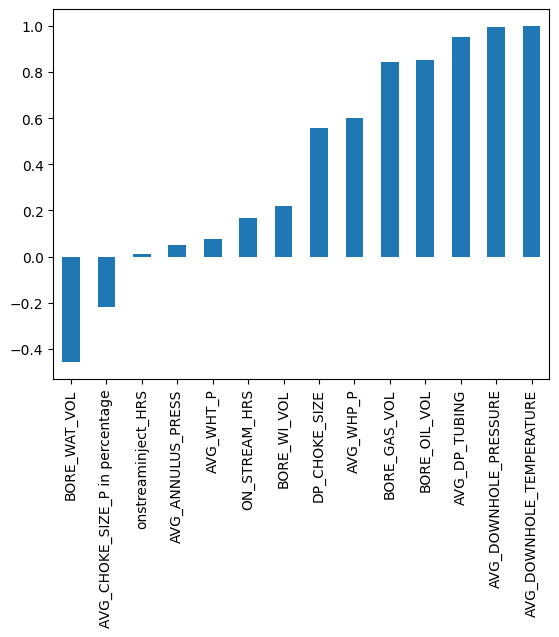

In [5]:
df.corr()['AVG_DOWNHOLE_TEMPERATURE'].sort_values().plot(kind='bar')

In [6]:
df.corr()['AVG_DOWNHOLE_TEMPERATURE'].sort_values()

BORE_WAT_VOL                     -0.456028
AVG_CHOKE_SIZE_P in percentage   -0.220456
onstreaminject_HRS                0.012351
AVG_ANNULUS_PRESS                 0.050419
AVG_WHT_P                         0.077749
ON_STREAM_HRS                     0.165454
BORE_WI_VOL                       0.221163
DP_CHOKE_SIZE                     0.556476
AVG_WHP_P                         0.600172
BORE_GAS_VOL                      0.845233
BORE_OIL_VOL                      0.850241
AVG_DP_TUBING                     0.952678
AVG_DOWNHOLE_PRESSURE             0.995501
AVG_DOWNHOLE_TEMPERATURE          1.000000
Name: AVG_DOWNHOLE_TEMPERATURE, dtype: float64

In [7]:
df = df[['BORE_WAT_VOL','DP_CHOKE_SIZE', 'AVG_WHP_P' , 'AVG_DP_TUBING' , 'BORE_OIL_VOL' , 'BORE_OIL_VOL' ,'AVG_DOWNHOLE_TEMPERATURE']]

In [8]:
df.head(2)

,BORE_WAT_VOL,DP_CHOKE_SIZE,AVG_WHP_P,AVG_DP_TUBING,BORE_OIL_VOL,BORE_OIL_VOL,AVG_DOWNHOLE_TEMPERATURE
2007-01-09,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2007-01-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0


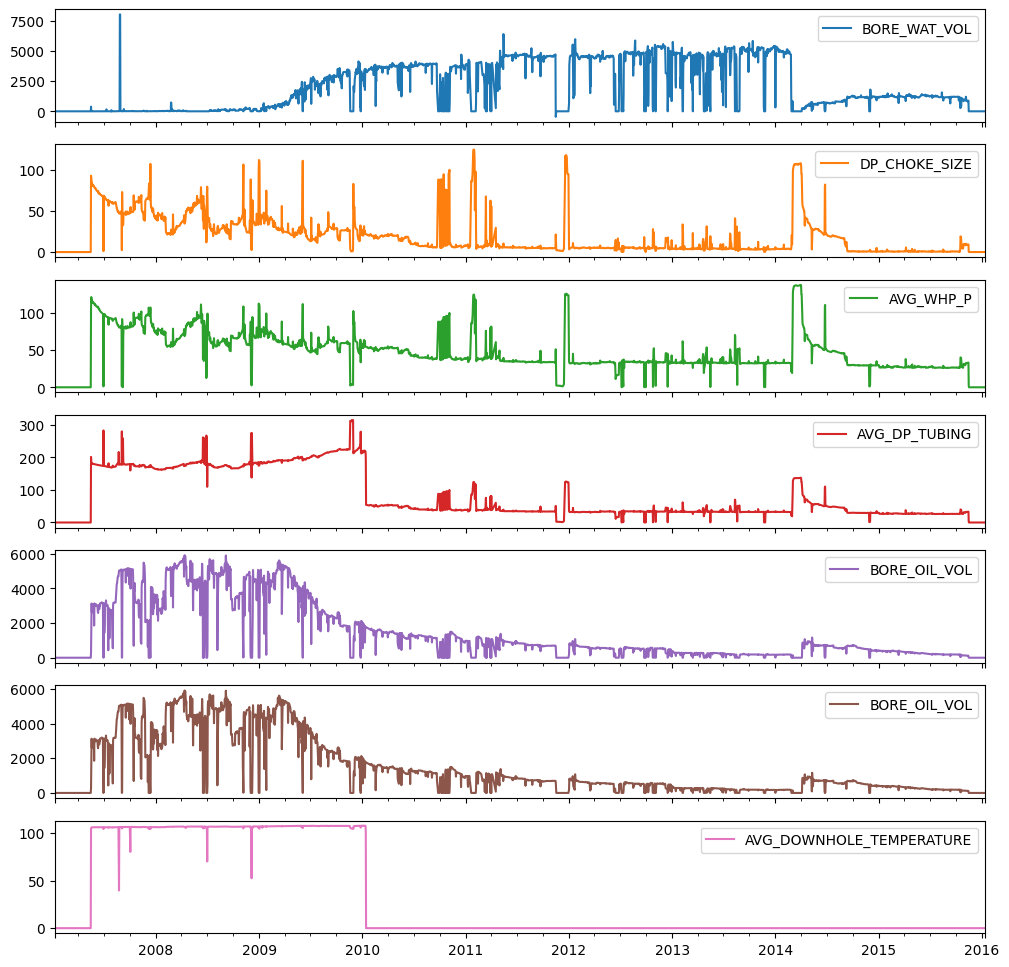

In [9]:
df.plot(figsize=(12,12) , subplots=True);

In [10]:
df = df[df.index.year <2010]

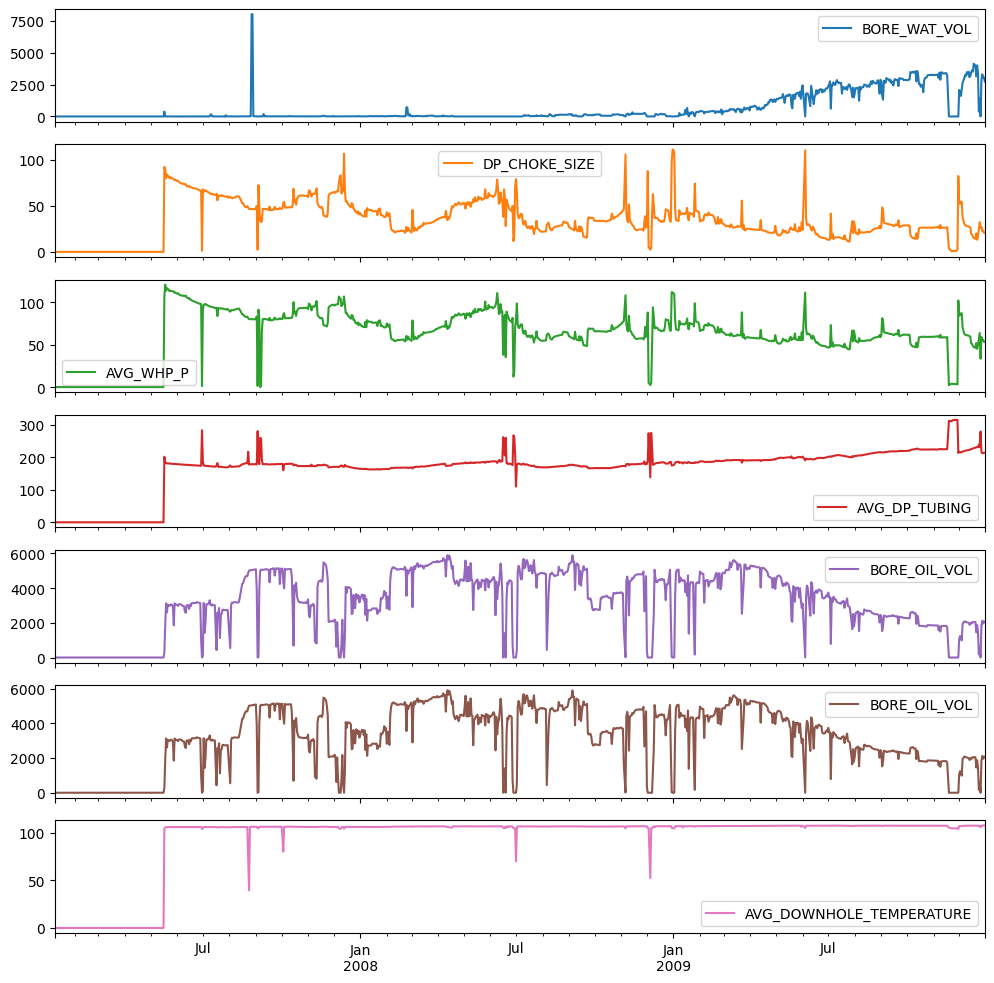

In [11]:
df.plot(figsize=(12,12) , subplots=True);

In [13]:
out = 'AVG_DOWNHOLE_TEMPERATURE'


In [14]:
df_train = df.iloc[:1000,:]
df_test = df.iloc[1000:,:]


In [15]:
X_train = df_train.drop(out, axis=1) ; y_train = df_train[out]
X_test = df_test.drop(out , axis=1) ; y_test = df_test[out]

In [16]:
y_train

2007-01-09      0.000
2007-01-10      0.000
2007-01-11      0.000
2007-01-12      0.000
2007-01-13      0.000
               ...   
2009-09-30    107.313
2009-10-01    107.312
2009-10-02    107.312
2009-10-03    107.310
2009-10-04    107.311
Name: AVG_DOWNHOLE_TEMPERATURE, Length: 1000, dtype: float64

In [17]:
X_train.shape , y_train.shape

((1000, 6), (1000,))

In [30]:
from sklearn.preprocessing import StandardScaler

In [32]:
S = StandardScaler()

In [34]:
X_train_scaled = S.fit_transform(X_train)
X_test_scaled = S.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [38]:
# model = LinearRegression()
model = RandomForestRegressor(n_estimators=200)

In [40]:
model.fit(X_train_scaled, y_train)


RandomForestRegressor(n_estimators=200)

In [42]:
yp_train = model.predict(X_train_scaled)
yp_test = model.predict(X_test_scaled)

<ipython-input-43-3fc9a8d247f4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(13672.0, 14609.0)

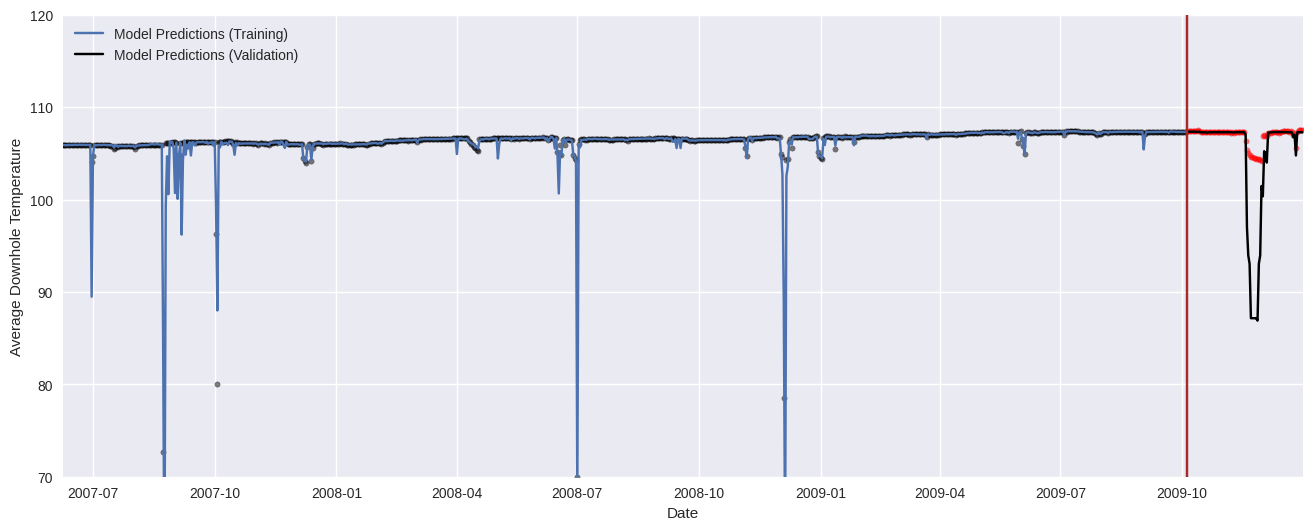

In [43]:
plt.figure(figsize=(16,6), dpi=100)
plt.style.use('seaborn')

plt.scatter(y_train.index , y_train , color='black', alpha=0.5, s=15)
plt.plot(y_train.index, yp_train , label='Model Predictions (Training)')

plt.scatter(y_test.index, y_test , color='red', alpha=0.5, s=15)
plt.plot(y_test.index, yp_test, color='black',label='Model Predictions (Validation)')

plt.axvline(y_test.index[0] , color='brown')


plt.ylabel('Average Downhole Temperature')
plt.xlabel('Date')

plt.legend()
plt.ylim(70,120)
plt.xlim(y_train.index[150] , y_test.index[-1])
